## WatsApp Analytics

In [2]:
#import data
import codecs
dat = codecs.open('chat.txt', encoding='utf-8')
lines = dat.readlines()
print('There are %d chats'%(len(lines)))

There are 5845 chats


In [15]:
#process lines

def process_lines(line):
    d=line.split('-')
    m=[]
    if len(d) == 2:
        m=d[1].split(':')
    if len(d) == 2 and len(m)==2:
        return (d[0],m[0],m[1])
    return ()

print('sample line - %s'%(lines[4]))
#<date>-<name>:<text>
processed_lines = [process_lines(line) for line in lines]
processed_lines = list(filter(lambda x: len(x)==3,processed_lines))
print('There are %d lines after processing'%(len(processed_lines)))

sample line - 6/22/17, 4:22 PM - nirmal kumar ravi: Yes

There are 5617 lines after processing


In [19]:
# convert date string to date
from datetime import datetime as dt

def datestr_to_date(date_str):
    date_str = date_str.strip()
    date_obj = dt.strptime(date_str, '%m/%d/%y, %I:%M %p')
    return date_obj

processed_lines = [(datestr_to_date(t[0]),t[1],t[2]) for t in processed_lines]      

In [23]:
# strip spaces in name and message
processed_lines = [(t[0],t[1].strip(),t[2].strip()) for t in processed_lines]
processed_lines[4]

(datetime.datetime(2017, 6, 22, 16, 22), u'Ramana infy', u'Fraudu payale')

In [24]:
# see all names
set(t[1] for t in processed_lines)

{u'Deepa infy',
 u'Ragapraba infy',
 u'Ramana infy',
 u'Suren infy',
 u'nirmal kumar ravi'}

### Lets do some charts

In [47]:
#some required libs
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df = pd.DataFrame(processed_lines)
df.columns = ['date','names','message']
df.head(3)

,date,names,message
0,2017-06-22 16:20:00,nirmal kumar ravi,Hi
1,2017-06-22 16:22:00,Deepa infy,Number mathita
2,2017-06-22 16:22:00,nirmal kumar ravi,Yes


### who has sent most messages?

In [37]:
count_df = df.groupby(['names']).agg(['count'])


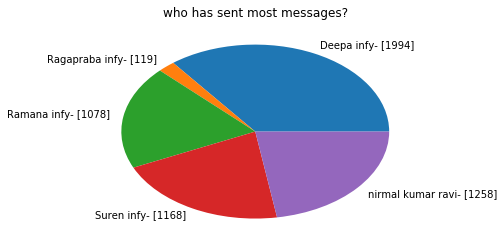

In [70]:
names = list(count_df.index)
count = list(count_df['message']['count'])
lables = []
for i in range(0,len(names)):
    lables.append('%s- [%d]'%(names[i],count[i]))
plt.title('who has sent most messages?')
plt.pie(count,labels=lables)
plt.show()

### messages sent by month

Text(0,0.5,u'No of messages')

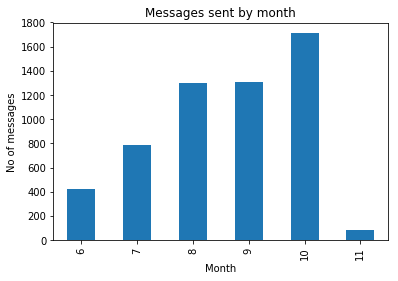

In [120]:
count_message_by_month_df = df.groupby(df.date.dt.month).count()['message']
msg_plt = count_message_by_month_df.plot(kind='bar',title='Messages sent by month')
msg_plt.set_xlabel('Month')
msg_plt.set_ylabel('No of messages')

### messsages sent by hour

Text(0,0.5,u'No of messages')

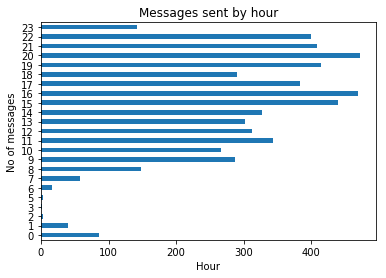

In [124]:
count_message_by_hour_df = df.groupby(df.date.dt.hour).count()['message']
msg_plt = count_message_by_hour_df.plot(kind='barh',title='Messages sent by hour')
msg_plt.set_xlabel('Hour')
msg_plt.set_ylabel('No of messages')

### messages sent by day

Text(0,0.5,u'No of messages')

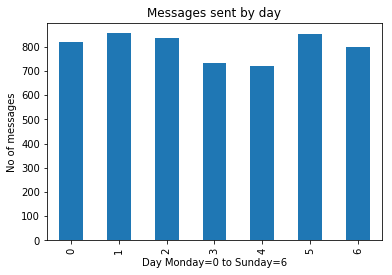

In [130]:
count_message_by_day_df = df.groupby(df.date.dt.dayofweek).count()['message']
msg_plt = count_message_by_day_df.plot(kind='bar',title='Messages sent by day')
msg_plt.set_xlabel('Day Monday=0 to Sunday=6')
msg_plt.set_ylabel('No of messages')

### Top 10 most message count dates 

In [174]:
df.groupby(df.date.dt.date)['message'].count().nlargest(10)

date
2017-09-10    153
2017-10-24    146
2017-10-29    146
2017-08-05    129
2017-09-12    128
2017-06-28    127
2017-10-19    118
2017-06-24    109
2017-09-09    107
2017-10-07    105
Name: message, dtype: int64

### Top 10 least message count dates 

In [178]:
df.groupby(df.date.dt.date)['message'].count().nsmallest(10)

date
2017-07-31    1
2017-10-10    1
2017-07-01    2
2017-07-20    3
2017-07-25    3
2017-07-04    4
2017-09-23    4
2017-10-22    4
2017-10-03    5
2017-08-08    6
Name: message, dtype: int64